In [1]:
import os
import sys
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

from helper_functions import *
from analytic_functions import *

pd.set_option('max_colwidth', -1)

In [2]:
total_messages, total_messages_with_id, participant_names = get_messages()
len(total_messages)

44595

### who has sent the most messages

In [3]:
pd.Series(message_count(total_messages, participant_names))

Armando Amigon         6211
Michael Sprintson      6146
Rene Carballo          5328
Patrick Chickey        3862
Fredy Martinez         3785
Justin Cheung          3751
Kevin Mejia            3248
Kevin Tu               3203
Zach Alvear            2504
Feme Longe             2408
Anirudh Kuchibhatla    2274
Joshua Bae             1875
dtype: int64

### most character count

In [4]:
pd.Series(average_character_count(total_messages, participant_names))

Justin Cheung          62.481829
Patrick Chickey        56.498802
Rene Carballo          46.283640
Zach Alvear            44.935924
Anirudh Kuchibhatla    41.914685
Armando Amigon         39.915160
Michael Sprintson      39.379872
Kevin Tu               38.760529
Fredy Martinez         33.458884
Feme Longe             33.436185
Joshua Bae             32.807292
Kevin Mejia            28.168662
dtype: float64

In [5]:
pd.Series(total_character_count(total_messages, participant_names))

Rene Carballo          239055
Armando Amigon         236178
Michael Sprintson      227340
Justin Cheung          220061
Patrick Chickey        212266
Fredy Martinez         124099
Kevin Tu               111359
Zach Alvear            108700
Anirudh Kuchibhatla    89907 
Kevin Mejia            82337 
Feme Longe             74663 
Joshua Bae             56691 
dtype: int64

### most reacted to message

In [6]:
most_reacted_to_message(total_messages_with_id)

{'sender_name': 'Kevin Tu',
 'timestamp_ms': 1594843341343,
 'content': 'Wow I just got an offer for full time at raytheon',
 'reactions': [{'reaction': 'ð\x9f\x92\x97', 'actor': 'Armando Amigon'},
  {'reaction': 'ð\x9f\x92\x97', 'actor': 'Feme Longe'},
  {'reaction': 'â\x9d¤', 'actor': 'Michael Sprintson'},
  {'reaction': 'â\x9d¤', 'actor': 'Zach Alvear'},
  {'reaction': 'â\x9d¤', 'actor': 'Anirudh Kuchibhatla'},
  {'reaction': 'ð\x9f\x92\x97', 'actor': 'Rene Carballo'},
  {'reaction': 'â\x9d¤', 'actor': 'Joshua Bae'},
  {'reaction': 'ð\x9f\x92\x97', 'actor': 'Patrick Chickey'},
  {'reaction': 'â\x9d¤', 'actor': 'Justin Cheung'},
  {'reaction': 'ð\x9f\x92\x97', 'actor': 'Fredy Martinez'},
  {'reaction': 'â\x9d¤', 'actor': 'Kevin Mejia'}],
 'type': 'Generic'}

### recieved reactions for every participant

In [7]:
reactions_recieved_by_all(participant_names, total_messages, returntype='pd')

,total,stats
Michael Sprintson,3851,"{'thumbs up': 1074.0, 'wow': 963.0, 'laughing': 639.0, 'cry': 637.0, 'pink heart': 177.0, 'thumbs down': 124.0, 'heart eyes': 108.0, 'angry': 96.0, 'purple heart': 33.0}"
Armando Amigon,3815,"{'thumbs up': 1147.0, 'wow': 833.0, 'cry': 751.0, 'laughing': 550.0, 'pink heart': 217.0, 'heart eyes': 147.0, 'angry': 79.0, 'thumbs down': 70.0, 'purple heart': 21.0}"
Kevin Tu,2519,"{'wow': 785.0, 'thumbs up': 476.0, 'laughing': 460.0, 'cry': 457.0, 'thumbs down': 141.0, 'pink heart': 88.0, 'angry': 57.0, 'heart eyes': 34.0, 'purple heart': 21.0}"
Justin Cheung,2408,"{'wow': 634.0, 'thumbs up': 537.0, 'laughing': 426.0, 'cry': 325.0, 'pink heart': 193.0, 'heart eyes': 134.0, 'angry': 88.0, 'thumbs down': 50.0, 'purple heart': 21.0}"
Feme Longe,2186,"{'wow': 516.0, 'laughing': 460.0, 'cry': 440.0, 'thumbs up': 439.0, 'pink heart': 125.0, 'heart eyes': 95.0, 'angry': 56.0, 'thumbs down': 47.0, 'purple heart': 8.0}"
Rene Carballo,2161,"{'thumbs up': 617.0, 'wow': 448.0, 'cry': 329.0, 'laughing': 294.0, 'thumbs down': 152.0, 'heart eyes': 108.0, 'pink heart': 105.0, 'angry': 102.0, 'purple heart': 6.0}"
Kevin Mejia,2106,"{'thumbs up': 625.0, 'wow': 447.0, 'cry': 366.0, 'laughing': 270.0, 'heart eyes': 130.0, 'thumbs down': 118.0, 'pink heart': 99.0, 'angry': 51.0}"
Patrick Chickey,1915,"{'thumbs up': 500.0, 'wow': 419.0, 'cry': 397.0, 'laughing': 260.0, 'pink heart': 144.0, 'thumbs down': 70.0, 'heart eyes': 61.0, 'angry': 47.0, 'purple heart': 17.0}"
Zach Alvear,1894,"{'thumbs up': 534.0, 'cry': 406.0, 'laughing': 362.0, 'wow': 359.0, 'pink heart': 84.0, 'heart eyes': 57.0, 'angry': 47.0, 'thumbs down': 42.0, 'purple heart': 3.0}"
Fredy Martinez,1692,"{'wow': 435.0, 'thumbs up': 377.0, 'cry': 283.0, 'laughing': 242.0, 'thumbs down': 152.0, 'angry': 75.0, 'heart eyes': 68.0, 'pink heart': 58.0, 'purple heart': 2.0}"


### specific react to messages reatio

In [8]:
react_to_messages_ratio(total_messages, participant_names)

,total reacted tos,total messages,reacted_to_message_ratio
Armando Amigon,3815.0,6211.0,0.614233
Feme Longe,2186.0,2408.0,0.907807
Michael Sprintson,3851.0,6146.0,0.626586
Zach Alvear,1894.0,2504.0,0.756390
Anirudh Kuchibhatla,1148.0,2274.0,0.504837
Rene Carballo,2161.0,5328.0,0.405593
Joshua Bae,1290.0,1875.0,0.688000
Patrick Chickey,1915.0,3862.0,0.495857
Justin Cheung,2408.0,3751.0,0.641962
Fredy Martinez,1692.0,3785.0,0.447028


### reactions given to participant per person

In [9]:
reactions_recieved_by_participant(total_messages, participant_names[0])

,number,reacts
Anirudh Kuchibhatla,976,"{'wow': 282, 'thumbs up': 265, 'cry': 195, 'laughing': 140, 'heart eyes': 49, 'pink heart': 39, 'thumbs down': 3, 'angry': 3}"
Rene Carballo,680,"{'thumbs up': 186, 'wow': 161, 'cry': 143, 'laughing': 120, 'pink heart': 30, 'thumbs down': 12, 'heart eyes': 10, 'purple heart': 10, 'angry': 8}"
Justin Cheung,496,"{'thumbs up': 193, 'cry': 102, 'wow': 90, 'laughing': 49, 'pink heart': 33, 'heart eyes': 21, 'angry': 4, 'thumbs down': 4}"
Feme Longe,380,"{'thumbs up': 107, 'wow': 105, 'cry': 80, 'laughing': 39, 'pink heart': 19, 'thumbs down': 13, 'angry': 9, 'heart eyes': 7, 'purple heart': 1}"
Kevin Mejia,362,"{'thumbs up': 110, 'cry': 76, 'laughing': 57, 'wow': 56, 'pink heart': 29, 'angry': 15, 'heart eyes': 13, 'thumbs down': 6}"
Patrick Chickey,263,"{'thumbs up': 80, 'wow': 56, 'cry': 43, 'laughing': 35, 'pink heart': 17, 'angry': 9, 'purple heart': 9, 'heart eyes': 7, 'thumbs down': 7}"
Michael Sprintson,231,"{'thumbs up': 64, 'laughing': 53, 'cry': 38, 'wow': 31, 'pink heart': 20, 'heart eyes': 11, 'angry': 10, 'thumbs down': 4}"
Joshua Bae,138,"{'thumbs up': 52, 'heart eyes': 17, 'wow': 15, 'pink heart': 14, 'laughing': 12, 'thumbs down': 11, 'cry': 9, 'angry': 8}"
Zach Alvear,133,"{'thumbs up': 43, 'laughing': 27, 'cry': 26, 'wow': 15, 'pink heart': 11, 'angry': 5, 'heart eyes': 5, 'thumbs down': 1}"
Kevin Tu,83,"{'cry': 30, 'thumbs up': 21, 'wow': 12, 'laughing': 11, 'thumbs down': 6, 'heart eyes': 2, 'angry': 1}"


### who has reacted what the most

In [10]:
reactions_given_by_all(total_messages)

,number,reacts
Anirudh Kuchibhatla,6766,"{'wow': 2024, 'thumbs up': 1439, 'cry': 1379, 'laughing': 1176, 'heart eyes': 354, 'pink heart': 251, 'angry': 77, 'thumbs down': 58, 'purple heart': 8}"
Rene Carballo,4573,"{'wow': 1212, 'thumbs up': 1061, 'laughing': 941, 'cry': 822, 'pink heart': 190, 'thumbs down': 144, 'heart eyes': 92, 'angry': 69, 'purple heart': 42}"
Armando Amigon,2783,"{'thumbs up': 768, 'wow': 641, 'cry': 568, 'laughing': 253, 'thumbs down': 201, 'pink heart': 172, 'angry': 126, 'heart eyes': 47, 'purple heart': 7}"
Justin Cheung,2664,"{'thumbs up': 942, 'wow': 578, 'cry': 465, 'laughing': 298, 'pink heart': 178, 'heart eyes': 101, 'thumbs down': 48, 'angry': 47, 'purple heart': 7}"
Feme Longe,2274,"{'wow': 724, 'thumbs up': 489, 'cry': 406, 'laughing': 283, 'thumbs down': 181, 'pink heart': 79, 'angry': 70, 'heart eyes': 28, 'purple heart': 14}"
Kevin Mejia,2160,"{'thumbs up': 469, 'cry': 381, 'laughing': 377, 'wow': 363, 'angry': 181, 'thumbs down': 153, 'pink heart': 147, 'heart eyes': 89}"
Patrick Chickey,1566,"{'thumbs up': 484, 'wow': 336, 'laughing': 229, 'cry': 191, 'pink heart': 85, 'thumbs down': 80, 'purple heart': 62, 'angry': 50, 'heart eyes': 49}"
Michael Sprintson,1354,"{'laughing': 329, 'thumbs up': 315, 'cry': 197, 'wow': 184, 'heart eyes': 109, 'pink heart': 103, 'angry': 68, 'thumbs down': 47, 'purple heart': 2}"
Joshua Bae,1145,"{'thumbs up': 353, 'laughing': 154, 'pink heart': 135, 'heart eyes': 126, 'wow': 112, 'thumbs down': 108, 'cry': 82, 'angry': 73, 'purple heart': 2}"
Zach Alvear,677,"{'thumbs up': 193, 'laughing': 171, 'cry': 108, 'wow': 84, 'pink heart': 47, 'thumbs down': 31, 'heart eyes': 22, 'angry': 18, 'purple heart': 3}"


### reactions given by participant

In [11]:
reactions_given_by_participant(total_messages, participant_names[0])

,number,reacts
Armando Amigon,2783,"{'thumbs up': 768, 'wow': 641, 'cry': 568, 'laughing': 253, 'thumbs down': 201, 'pink heart': 172, 'angry': 126, 'heart eyes': 47, 'purple heart': 7}"
Anirudh Kuchibhatla,1060,"{'wow': 287, 'cry': 269, 'laughing': 197, 'thumbs up': 154, 'heart eyes': 55, 'pink heart': 52, 'thumbs down': 23, 'angry': 22, 'purple heart': 1}"
Rene Carballo,828,"{'wow': 258, 'cry': 181, 'laughing': 140, 'thumbs up': 130, 'thumbs down': 37, 'pink heart': 30, 'heart eyes': 27, 'angry': 22, 'purple heart': 3}"
Feme Longe,506,"{'wow': 145, 'cry': 106, 'thumbs up': 85, 'laughing': 68, 'thumbs down': 52, 'pink heart': 21, 'angry': 18, 'heart eyes': 7, 'purple heart': 4}"
Kevin Mejia,454,"{'cry': 87, 'laughing': 82, 'thumbs up': 81, 'wow': 66, 'angry': 45, 'thumbs down': 36, 'pink heart': 31, 'heart eyes': 26}"
Justin Cheung,452,"{'thumbs up': 109, 'cry': 104, 'wow': 92, 'laughing': 66, 'pink heart': 35, 'heart eyes': 20, 'angry': 14, 'thumbs down': 11, 'purple heart': 1}"
Patrick Chickey,261,"{'thumbs up': 74, 'wow': 50, 'cry': 43, 'laughing': 38, 'thumbs down': 19, 'pink heart': 17, 'heart eyes': 10, 'angry': 8, 'purple heart': 2}"
Michael Sprintson,258,"{'laughing': 57, 'cry': 46, 'thumbs up': 44, 'wow': 36, 'heart eyes': 28, 'pink heart': 22, 'angry': 13, 'thumbs down': 11, 'purple heart': 1}"
Joshua Bae,222,"{'thumbs up': 60, 'laughing': 34, 'heart eyes': 33, 'pink heart': 25, 'wow': 20, 'cry': 18, 'thumbs down': 18, 'angry': 14}"
Zach Alvear,176,"{'thumbs up': 53, 'laughing': 42, 'cry': 26, 'wow': 21, 'thumbs down': 14, 'pink heart': 9, 'heart eyes': 6, 'angry': 4, 'purple heart': 1}"


### average reactions to participant message and max reactions

In [12]:
average_and_max_reactions_for_participant(total_messages, participant_names[4])

(2.0, 2)

### which message did kevin react to himself

In [13]:
pd.DataFrame(self_reacts(total_messages, participant_names[0]))

,sender_name,timestamp_ms,content,reactions,type
0,Armando Amigon,1578527436980,Like this message if you are in 475,"[{'reaction': 'ð', 'actor': 'Armando Amigon'}, {'reaction': 'ð', 'actor': 'Feme Longe'}, {'reaction': 'ð', 'actor': 'Anirudh Kuchibhatla'}, {'reaction': 'ð', 'actor': 'Joshua Bae'}, {'reaction': 'ð', 'actor': 'Patrick Chickey'}, {'reaction': 'ð', 'actor': 'Kevin Mejia'}]",Generic
1,Armando Amigon,1579314671340,Someone kick Fredy,"[{'reaction': 'ð', 'actor': 'Armando Amigon'}, {'reaction': 'ð¢', 'actor': 'Anirudh Kuchibhatla'}]",Generic
2,Armando Amigon,1579451888577,Like this if you are going,"[{'reaction': 'ð', 'actor': 'Armando Amigon'}, {'reaction': 'ð', 'actor': 'Michael Sprintson'}, {'reaction': 'ð', 'actor': 'Zach Alvear'}, {'reaction': 'ð', 'actor': 'Joshua Bae'}, {'reaction': 'ð', 'actor': 'Justin Cheung'}, {'reaction': 'ð', 'actor': 'Kevin Mejia'}]",Generic
3,Armando Amigon,1582150175847,ð§,"[{'reaction': 'ð', 'actor': 'Armando Amigon'}]",Generic


### kevins most common words

In [14]:
most_common_words_by_participant(total_messages, participant_names[2]).head(20)

im          110
wait        84 
lmao        77 
time        71 
stuff       58 
way         54 
thing       49 
simar       47 
iâm       47 
class       47 
everyone    45 
itâs      43 
week        42 
someone     42 
work        41 
anyone      40 
anything    40 
group       39 
game        38 
nickname    37 
dtype: int64

### groups most common words

In [15]:
# most_common_words([i['content'] for i in total_messages if 'content' in i]).head(20)

### all nicknames of particpant

In [16]:
participant = participant_names[4]
participant

'Anirudh Kuchibhatla'

In [17]:
pnamereturn, ptimereturn = nickname_changes_and_times(total_messages, participant)

In [18]:
pnamereturn

,0
Joshua Bae,"[Ani Guccibhatla., cheat sheet delivery.]"
Michael Sprintson,"[Ani Gucciballa., gets laid with the fellas., sherlock holmes., bloomberg fanatic.]"
Rene Carballo,"[Ani Gucciballa (Accounting)., gets laid with the young fellas ð.]"
Justin Cheung,[gets laid with the fellas.]
Kevin Tu,[Epstein didn't kill himself.]


In [19]:
ptimereturn

sherlock holmes.                         6130550647
Ani Gucciballa (Accounting).             4690997085
gets laid with the fellas.               2679135608
Ani Gucciballa.                          3050001   
cheat sheet delivery.                    388310    
gets laid with the young fellas ð.    245498    
Ani Guccibhatla.                         24891     
Epstein didn't kill himself.             21838     
dtype: int64

 ## group name changes

In [20]:
pd.Series(group_name_changes_timeline(total_messages))

Shockj Bojs.                      10316133189
jllumjnatj.                       7929928712 
Shocki Bois.                      1950046060 
every night at fredys.            1914519071 
sad boi elecs (in quarantine).    1217456814 
The Alpha ELEC Group Chat.        1045727243 
sad boi elecs.                    588028079  
Opensource HW Answers.            580061751  
Funded By Simar (Satire).         525119715  
wwj troops (ð¤¬).                356026100  
220 Volunteers (Satire).          174060342  
misery loves Simar.               68213759   
220 Volunteers.                   12541105   
ELEC Goon Squad.                  3622140    
misery loves company.             282359     
DoJo's Dojo.                      82395      
ww4 troops (angry).               65235      
Armando Is A Bully.               61724      
wwj troops (angry).               49476      
A N G E R J  Bojs.                44964      
Fredy and the Bois.               37049      
Fredy and the Oppressed.          

### usage per person

In [21]:
specialpn = 'Rene Carballo'

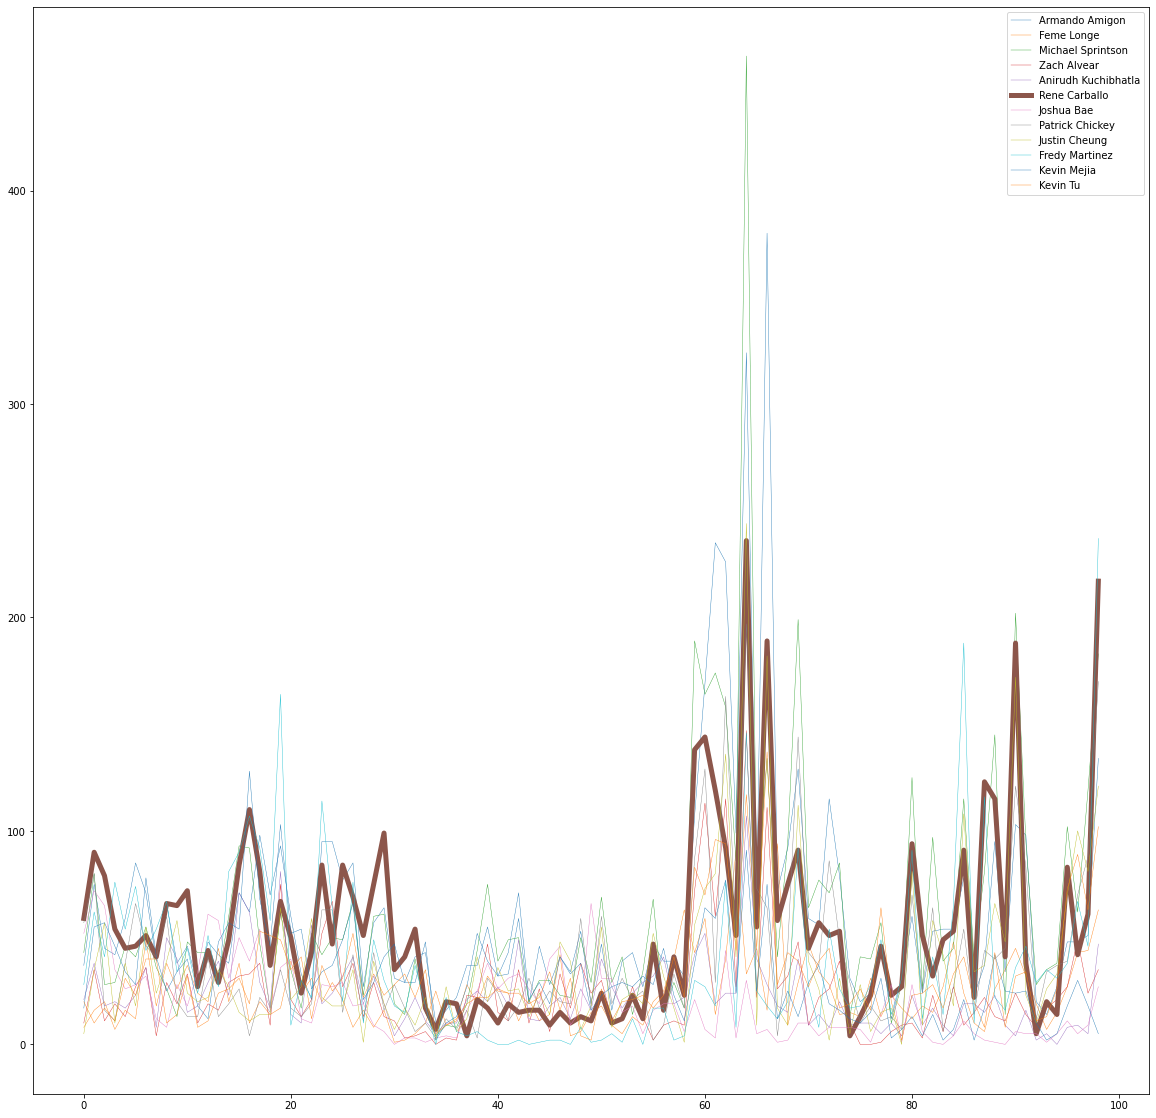

In [22]:
usage_participant_highlighted(total_messages, participant_names, specialpn)

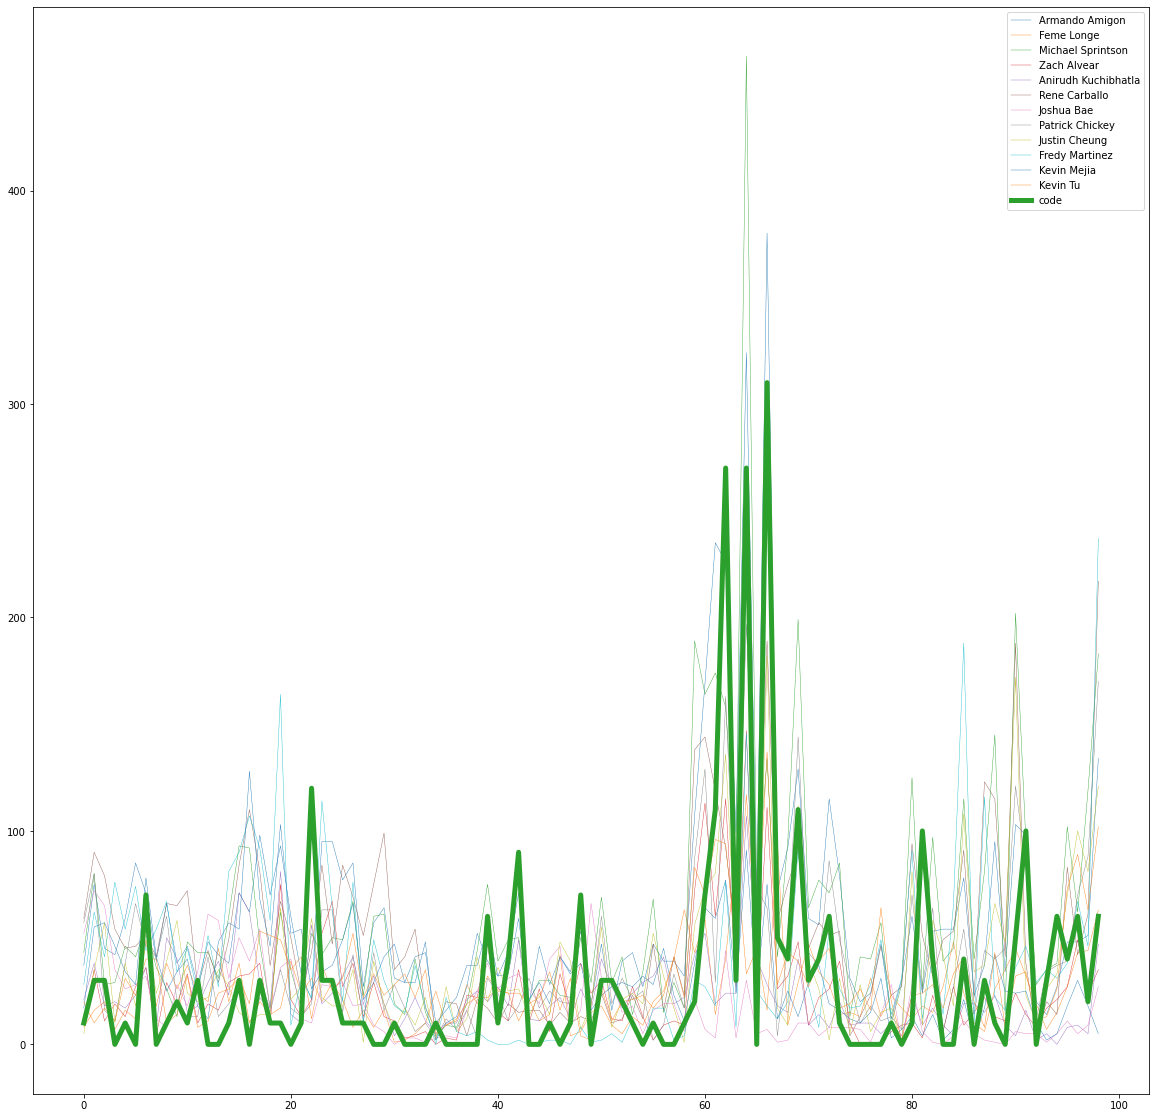

In [23]:
word_usage_highlighted(total_messages, participant_names, 'code')

### photos count

In [24]:
most_common_photo_sender(total_messages)

Michael Sprintson      331
Kevin Tu               316
Kevin Mejia            314
Armando Amigon         265
Justin Cheung          218
Feme Longe             165
Rene Carballo          146
Joshua Bae             135
Anirudh Kuchibhatla    117
Patrick Chickey        98 
Zach Alvear            71 
Fredy Martinez         65 
dtype: int64

### reading level

In [25]:
# rdng_levels = {}
# for pn in participant_names:
#     pmes = [i['content'] for i in total_messages if 'content' in i and pn == i['sender_name']]
#     textblob = reduce(lambda a,b: a + ' ' + b, pmes)
#     rdng_levels[pn] = textstat.smog_index(textblob)

In [26]:
# pd.Series(rdng_levels).sort_values(ascending=False)

In [27]:
# import textstat

In [28]:
# textstat.gunning_fog('Esteemed friends and colleagues, please disregard this foolish momentary abandonment of my eloquence related endeavors. When faced with the visage of statistics and scholarship, feeling the exhilarating thrill of problem solving, I briefly forgot myself and the notions to which I had previously committed myself. As I mentioned before, the further we become removed from this discussion the more likely and frequent such lapses will become, but such is life.')

### most common tags per person

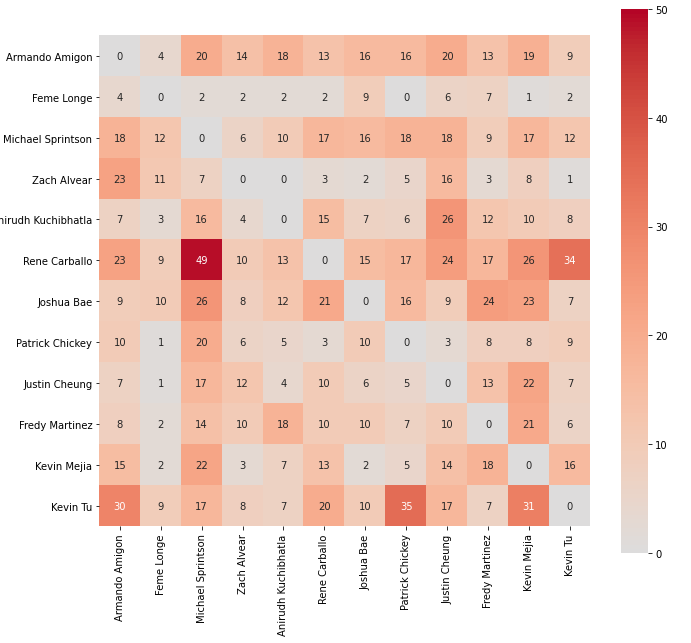

In [30]:
tag_correlation_matrix(participant_names, total_messages)